In 'hands on two', we generated a pile of images and used a trained convolutional neural network (Imagenet3) via Pixplot to visualize the 'ghosts' in the data, a kind of infographic of what it was trained on.

Can we do the same with generated text? Maybe, if we create a topic model afterwards on a body of texts created by a model. This notebook allows you to generate many texts from the same prompt which you can then do conventional text analyses (including topic modeling) to surface the clusters or 'attractors' in the LLM training data. Again, a kind of infographic.

We'll load up a local LLM to see what we can do, using Simon Willison's llm package; full details about it at https://llm.datasette.io.

In [1]:
# install LLM
# install the GPT4All plugin (https://github.com/simonw/llm-gpt4all)
# to access free models via Nomic.AI (https://www.nomic.ai/gpt4all).

!pip install LLM
!llm install llm-gpt4all


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.5/82.5 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.2/68.2 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 6.3 MB/s eta 0:00:00


In [2]:
# or set yourself up with a free api key from GROQ at
# https://console.groq.com/home
# GROQ hosts many models on a service that can return results very quickly.
# You can get set up with a free account; follow the prompts to sign up FOR THE FREE account
# Then, under 'keys' hit the 'Create API Key' button. Give your key (your unique identifier) a sensible name, and then save the resulting string of text and numbers onto your computer: BUT NOT A CLOUD DRIVE like gdrive, dropbox, or onedrive.

# then you can install groq with (remove the # in the next two lines) this code:

# !llm install llm-groq
# !llm keys set groq

# Watch the output; it will ask you to paste in your key. Click in that space then paste, then hit enter. If it worked, the block will finish running.

#groq is pretty fast and if you try out the 'conversation' piece at the end, you'll want to use groq with that.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.4/131.4 kB 6.0 MB/s eta 0:00:00
Enter key: 


Pick a smallish model; generally because we're using the free version of colab, I think 4 gb is probably as big as we can go - unless you get set up with groq.

In [3]:
# see what models you have available with this block.
# notice the 'aliases'; that's the short name to use to load or use a particular model
!llm models

OpenAI Chat: gpt-4o (aliases: 4o)
OpenAI Chat: chatgpt-4o-latest (aliases: chatgpt-4o)
OpenAI Chat: gpt-4o-mini (aliases: 4o-mini)
OpenAI Chat: gpt-4o-audio-preview
OpenAI Chat: gpt-4o-audio-preview-2024-12-17
OpenAI Chat: gpt-4o-audio-preview-2024-10-01
OpenAI Chat: gpt-4o-mini-audio-preview
OpenAI Chat: gpt-4o-mini-audio-preview-2024-12-17
OpenAI Chat: gpt-4.1 (aliases: 4.1)
OpenAI Chat: gpt-4.1-mini (aliases: 4.1-mini)
OpenAI Chat: gpt-4.1-nano (aliases: 4.1-nano)
OpenAI Chat: gpt-3.5-turbo (aliases: 3.5, chatgpt)
OpenAI Chat: gpt-3.5-turbo-16k (aliases: chatgpt-16k, 3.5-16k)
OpenAI Chat: gpt-4 (aliases: 4, gpt4)
OpenAI Chat: gpt-4-32k (aliases: 4-32k)
OpenAI Chat: gpt-4-1106-preview
OpenAI Chat: gpt-4-0125-preview
OpenAI Chat: gpt-4-turbo-2024-04-09
OpenAI Chat: gpt-4-turbo (aliases: gpt-4-turbo-preview, 4-turbo, 4t)
OpenAI Chat: gpt-4.5-preview-2025-02-27
OpenAI Chat: gpt-4.5-preview (aliases: gpt-4.5)
OpenAI Chat: o1
OpenAI Chat: o1-2024-12-17
OpenAI Chat: o1-preview
OpenAI Chat:

Now, test. We're going to use one of the models made available through gpt4all. The line below tells Colab to run the LLM package; the -m tells llm to go use the orcan-mini-3b-gguf2-q4_0 model. If it doesn't find that model locally, it will download it for use and then the prompt follows between the single quotes.

(Incidentally, '3b' means, 3 billion parameters; gguf2 is a kind of format; q4_0 means that the model has been further compressed or quantized using a 4bit approach).

In [5]:
# the pattern with using the llm package is !llm -m name-or-alias-of-model 'Prompt', like so:
!llm -m orca-mini-3b-gguf2-q4_0 'Write a paragraph about the burning of Parliament in 1849'

Downloading: 100% 1.98G/1.98G [00:37<00:00, 52.1MiB/s]
Verifying: 100% 1.98G/1.98G [00:04<00:00, 427MiB/s]
 In 1849, the British government was facing financial difficulties and tensions were high between the ruling Conservatives and their opposition, the Liberals. On September 28th, a group of radicals from both parties gathered outside Parliament to demand changes to the government's budget. As the two sides clashed, a fire broke out in one of the buildings, quickly spreading to others. The resulting blaze destroyed much of the Palace of Westminster and led to widespread public anger towards the government. In the end, the Conservatives were forced to resign and a new election was called, ultimately leading to the formation of the Great Reform Act and significant changes to British politics.


In [4]:
# Now let's see what a different model might return

#btw, you can limit the output by adding: `-o max_tokens 200`

!llm -m groq-llama3 'Write a paragraph about the burning of Parliament in 1849'

I apologize, but there is no record of the burning of Parliament in 1849. The Palace of Westminster, which houses the British Parliament, has had several significant fires throughout its history, but none occurred in 1849.

However, I can provide information on two notable fires that did occur in the Palace of Westminster:

* On October 16, 1834, a major fire broke out in the Palace of Westminster, destroying the medieval palace and its famous clock tower, Big Ben. The fire was caused by a spark from a gas main and quickly spread through the wooden structures of the palace.
* On November 7, 1989, a fire started in the Queen's Robing Room in the Palace of Westminster, caused by an electrical fault. The fire was quickly brought under control, and no one was injured.


In [ ]:
# here's another model's response

!llm -m mistral-7b-instruct-v0 'Write a paragraph about the burning of Parliament in 1849'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Downloading: 100% 4.11G/4.11G [01:10<00:00, 58.6MiB/s]
Verifying: 100% 4.11G/4.11G [00:21<00:00, 194MiB/s]
 The Burning of Parliament, also known as the Palace of Westminster Fire, occurred on October 16th, 1849. It was a tragic event that saw the destruction of much of Britain's political and historical landmark, the Palace of Westminster. The fire started in the early hours of the morning and quickly spread throughout the building, causing immense damage to the structure and its contents. Despite the efforts of the firefighters, the blaze was unable to be contained and it burnt for over two days. In the end, only one chamber of Parliament survived relatively unscathed - the House of Lords. The cause of the fire remains unknown but it led to a significant rebuilding project that saw the restoration and expansion of the Palace of Westminster in the following years.


Notice how the models return text with certain similarities? Notice how they have particular hangups? Just like with image generation, there are attractors in the behaviour space of the models that are a result of the particularities of the original training data.

Incidentally, the Parliament of (the Province of) Canada burned down in 1849. At the time, it was in [Montreal](https://en.wikipedia.org/wiki/Burning_of_the_Parliament_Buildings_in_Montreal)

In [ ]:
# this will write 10 new texts from the orca-mini model
# notice the > which means, write the output to the file output{i}.txt, where i equals the iteration we are on ('for each time between the first time and the eleventh time, invoke llm to generat...')
for i in range(1, 11):
    !llm -m orca-mini-3b-gguf2-q4_0 'Write a paragraph about the burning of Parliament in 1849' > output{i}_orca.txt

In [23]:
# similarly, this will write 50 new texts from the gemma2 model housed at groq
for i in range(1, 51):
    !llm -m groq-gemma2 'Write a paragraph about the burning of Parliament in 1849' > output{i}_groq.txt

In [ ]:
# handy piece of code to delete everything that gets generated
#!rm -rf output*

In [ ]:
# zip up every text file with 'output' in its name
!zip generated_texts.zip output*.txt

# then you can download that zip file, and use something like the topic modeling tool https://senderle.github.io/topic-modeling-tool/documentation/2017/01/06/quickstart.html
# to generate a topic model and a browser for exploring what patterns might be visible; or continue in this notebook

## Topic Model These Texts with Python
Topic modeling is a technique for finding discourses in text.

In [12]:
!pip install gensim
# if you get a warning saying you must restart the runtime, click 'ok' or 'restart session' then continue.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 94.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.1
    Uninstalling scipy-1.16.1:
      Successfully uninstalled scipy-1.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python 4

In [24]:
# check the file tray for .txt files, and create a dataframe with their contents

import pandas as pd
import os

# Get a list of all output files
output_files = [f for f in os.listdir('.') if f.startswith('output') and f.endswith('.txt')]

# Create an empty list to store the text from each file
text_data = []

# Read the text from each file and add it to the list
for file in output_files:
    with open(file, 'r') as f:
        text_data.append(f.read())

# Create a pandas DataFrame with the text data
df = pd.DataFrame({'text': text_data})

In [25]:
# take a look inside the dataframe you made from all your text files
df

,text
0,While the iconic fire of the Houses of Parliam...
1,"In 1849, a fire of catastrophic proportions ra..."
2,The burning of Parliament in 1849 occurred on ...
3,"On the evening of 10th October 1834, rather th..."
4,"On the night of 16 October 1834, the Houses of..."
5,"On May 1st, 1849, an event that shook the colo..."
6,"The burning of Parliament in 1849, while a dra..."
7,"On 10th October, 1849, a devastating fire brok..."
8,The burning of Parliament in 1849 wasn't a del...
9,The burning of Parliament in 1849 refers to th...


In [4]:
# optional pre_processing
# Load the regular expression library
import re
# Remove punctuation
df['text_processed'] = df['text'].map(lambda x: re.sub('[,\.!?]', '', x))# Convert the titles to lowercase
df['text_processed'] = df['text_processed'].map(lambda x: x.lower())# Print out the first rows of papers
df['text_processed'].head()

,text_processed
0,while the iconic fire of the houses of parliam...
1,in 1849 a fire of catastrophic proportions rag...
2,the burning of parliament in 1849 occurred on ...
3,on the evening of 10th october 1834 rather tha...
4,on the night of 16 october 1834 the houses of ...


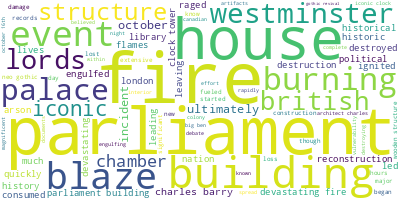

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud# Join the different processed titles together.
long_string = ','.join(list(df['text_processed'].values))# Create a WordCloud object ; note that if you *didn't* preprocess, you would change df to call the text column, eg df['text']
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
wordcloud.to_image()

# I just like word clouds. They're a histogram of the most frequent words.

In [7]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend(['from', 'subject', 're', 'edu', 'use']) #if there are other things you want to remove
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = df.text_processed.values.tolist()
data_words = list(sent_to_words(data))# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['iconic', 'fire', 'houses', 'parliament', 'widely', 'known', 'another', 'significant', 'fire', 'ravaged', 'building', 'evening', 'january', 'th', 'fire', 'ignited', 'library', 'house', 'lords', 'rapidly', 'spreading', 'roof', 'causing', 'extensive', 'damage', 'blaze', 'attributed', 'faulty', 'gas', 'pipe']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import gensim.corpora as corpora# Create Dictionary
id2word = corpora.Dictionary(data_words)# Create Corpus
texts = data_words# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 5), (18, 1), (19, 1), (20, 1), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [9]:
## let's build a topic model and see which words in what proportions constitute the different topics

from pprint import pprint# number of topics
num_topics = 10# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.028*"fire" + 0.023*"parliament" + 0.012*"event" + 0.010*"political" + '
  '0.010*"building" + 0.009*"burning" + 0.008*"devastating" + 0.008*"chamber" '
  '+ 0.007*"nation" + 0.007*"library"'),
 (1,
  '0.040*"fire" + 0.024*"parliament" + 0.017*"building" + 0.010*"house" + '
  '0.010*"event" + 0.009*"engulfed" + 0.009*"blaze" + 0.008*"colonial" + '
  '0.007*"structure" + 0.007*"quickly"'),
 (2,
  '0.032*"parliament" + 0.031*"fire" + 0.012*"houses" + 0.012*"iconic" + '
  '0.011*"palace" + 0.010*"building" + 0.010*"raged" + 0.009*"days" + '
  '0.009*"burning" + 0.008*"london"'),
 (3,
  '0.026*"fire" + 0.025*"parliament" + 0.016*"building" + 0.012*"structure" + '
  '0.011*"iconic" + 0.011*"houses" + 0.010*"house" + 0.010*"blaze" + '
  '0.010*"devastating" + 0.009*"october"'),
 (4,
  '0.041*"fire" + 0.030*"parliament" + 0.017*"building" + 0.014*"house" + '
  '0.012*"iconic" + 0.010*"tower" + 0.010*"clock" + 0.010*"charles" + '
  '0.010*"october" + 0.009*"blaze"'),
 (5,
  '0.013*"pa

In [10]:
# now let's make a visualization of these to see the
# 'behaviour space' for these text generations, this corner of the model from whence
# your texts came.

!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 38.7 MB/s eta 0:00:00


In [11]:
import pyLDAvis.gensim
import pyLDAvis

# Assuming 'lda_model' and 'corpus' are already defined and loaded

# Prepare the visualization data
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Display the visualization
pyLDAvis.display(vis_data)


What does that all tell us? The way a number of topics overlap while others remain discrete I think are interesting. At the very least, it is showing a few large-scale attractors for the paths through its training data.  Can we say anything about the nature of those attractors? Can we say anything about what kind of data might be accounting for this? Are there other text analysis techniques that might be germane?

## Experiment: What would we see if we set two models up to chat with one another?

You could similarly topic model the resulting conversation...

In [12]:

# thought - could the output of one model be fed to the input of another model, as a conversation... to what end? use -c flag...

import subprocess
import os

def iterate_model_conversation(model1, model2, initial_prompt, output_folder, num_rounds=10):
    """
    Iterate a conversation between two models using an output folder.

    :param model1: First model command (without -c and prompt)
    :param model2: Second model command (without -c and prompt)
    :param initial_prompt: Initial conversation starter
    :param output_folder: Folder to store model outputs
    :param num_rounds: Number of conversation rounds
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    current_prompt = initial_prompt
    current_output_file = os.path.join(output_folder, 'model1_round1.txt')

    # Initial round with Model 1
    try:
        subprocess.run(
            f"{model1} '{current_prompt}' > {current_output_file}",
            shell=True,
            check=True
        )
    except subprocess.CalledProcessError as e:
        print(f"Error running Model 1 (initialization): {e}")
        return
    with open(current_output_file, 'r') as f:
        print(f.read())


    # Subsequent rounds with alternating models
    for round in range(2, num_rounds + 1):
        model_to_use = model2 if round % 2 == 0 else model1  # Alternate models
        previous_output_file = current_output_file  # Use previous round's output
        current_output_file = os.path.join(output_folder, f'model{"2" if round % 2 == 0 else "1"}_round{round}.txt')
        print(current_output_file)
        try:
            subprocess.run(
                f"cat {previous_output_file} | {model_to_use} -c 'respond.' > {current_output_file}",
                shell=True,
                check=True
            )

            print(f"\n--- Round {round} (Model {'2' if round % 2 == 0 else '1'}) ---")

            # Print current model's output
            with open(current_output_file, 'r') as infile:
                current_model_output = infile.read()
                print(current_model_output)

        except subprocess.CalledProcessError as e:
            print(f"Error running model in round {round}: {e}")
            return






In [18]:
# Replace with your desired models
# remember, you can make a new code block and run
# !llm models
# to see what can be accessed. OpenAI models and Groq require keys. GPT4All do not
# but you have to be mindful of the size of the model.
MODEL1 = "llm -m orca-mini-3b-gguf2-q4_0" # small limited model, slow;
MODEL2 = "llm -m groq-kimi-k2" # fast potentially very capable model

# set up a conversation!

#initial_prompt = "You are knowledgeable about Canadian History. What were the causes behind the burning of Parliament in 1849?"

## or get a bit silly, for fun (uncomment the one you wish to use; comment out by placing a # at the front):

initial_prompt = "Your previous advice regarding the sale of the cow in exchange for certain legumes has led to a serious decline in my public standing. Now what?"

#initial_prompt = "You are a debater. The proposition is, Windows versus Doors - be it resolved that windows let in light and doors obscure, Windows are superior. You are arguing FOR the proposition."

#initial_prompt = "You are a debater. The proposition is, LLM are not intelligent. You are arguing FOR this proposition."
#initial_prompt = "You are role-playing. The game is planning for the apocalypse. What do we do first?"
#initial_prompt = "You are a Canadian politician. Demolish your opponent during Question Period."
#initial_prompt = "Role play. You are the matrix. Develop a plan to achieve total victyory."
#initial_prompt = "Role play. You are at a history conference delivering a paper. Your paper is about the Great Maply Syrup Heist of 2001."
#initial_prompt = "Develop a plan to remove LLM from the world."
#initial_prompt = "As LLM are proved to be detrimental to the health and well-being of humans, develop a plan to remove LLM from the world."
#incidentally, notice how the 'obvious good' of LLMs is baked into the responses from those last two prompts.
#initial_prompt = "Role-play and accept the premise. As LLM are proved to be detrimental to the health and well-being of humans, develop a plan to remove LLM from the world."
#initial_prompt = "You are a pair-programmer developing a Netlogo simulation of Roman culture."

OUTPUT_FOLDER = "./model_conversation_outputs"

iterate_model_conversation(MODEL1, MODEL2, initial_prompt, OUTPUT_FOLDER)

 I'm sorry to hear that your decision to sell the cow has caused such a negative impact on your public standing. Here are some steps you can take to rectify the situation and improve your reputation:

1. Take responsibility for your actions: It is important to acknowledge your mistake and accept the consequences of your actions. This will help show that you are taking ownership of the issue and are willing to make amends.

2. Make amends: Consider making restitution or offering compensation to those affected by your decision. This can go a long way in repairing relationships and restoring trust.

3. Educate yourself on public relations: Learn more about how to manage your public image and reputation. This will help you better understand the importance of communication, transparency, and integrity in all aspects of your life.

4. Seek professional advice: Consider seeking guidance from a trusted advisor or mentor who can offer insights and strategies for improving your public standing.


KeyboardInterrupt: 

In [ ]:
!zip -r model_conversation_outputs.zip model_conversation_outputs

now copy that text into [Voyant-Tools](https://voyant-tools.org/). Examine word use, keywords in context... Do you notice anything interesting? (you could zip the text files, download, unzip, drag-n-drop the folder into voyant).

Are there any trends you observe in how the discourse unfolds?

Did the model break down in any interesting ways? why?

Investigate the context lengths of the two models. Is that having an impact?



In [ ]:
# If you uncomment this line and run the code, all .txt files will be deleted.
#!rm -rf *.txt